In [1]:
analysis.anova <- read.csv("C:/Users/radhapavan/Desktop/Alex/anova.csv", sep=",", header = TRUE)


In [2]:
str(analysis.anova)

'data.frame':	1048575 obs. of  3 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ parent_category_name: Factor w/ 9 levels "Animals","Consumer electronics",..: 6 4 2 6 9 6 4 6 6 6 ...
 $ deal_probability    : num  0.128 0 0.432 0.803 0.208 ...


In [5]:
is.factor(analysis.anova$parent_category_name)

[1] TRUE

In [6]:
levels(analysis.anova$parent_category_name)

[1] "Animals"                "Consumer electronics"   "For business"          
[4] "For home and cottages"  "Hobbies and Recreation" "Personal things"       
[7] "The property"           "The services"           "Transport"

In [7]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



<h1> First Basic data summary </h1>


In [8]:
group_by(analysis.anova, parent_category_name) %>%
  summarise(
    count = n(),
    mean = mean(deal_probability, na.rm = TRUE),
    sd = sd(deal_probability, na.rm = TRUE)
  )

parent_category_name,count,mean,sd
Animals,36597,0.23661539,0.2869582
Consumer electronics,120880,0.17496128,0.2787824
For business,12629,0.11146424,0.2178563
For home and cottages,124477,0.17958620,0.3065312
Hobbies and Recreation,60152,0.12320775,0.2594957
Personal things,486510,0.07596101,0.2092683
The property,106565,0.14201891,0.1916491
The services,44885,0.40239752,0.3461604
Transport,55880,0.26201842,0.2920424


Warning message in bxp(structure(list(stats = structure(c(0, 0, 0.11023, 0.38391, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

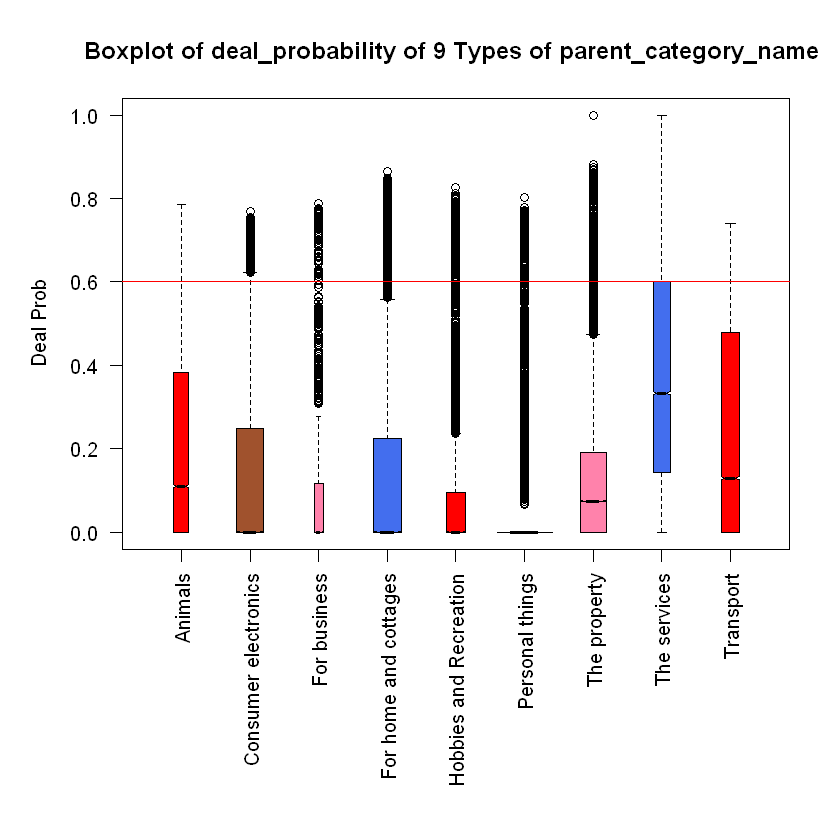

In [13]:
boxplot(analysis.anova$deal_probability~analysis.anova$parent_category_name, main="Boxplot of deal_probability of 9 Types of parent_category_name ", las=2,
col = c("red","sienna","palevioletred1","royalblue2","red","sienna","palevioletred1", "royalblue2","red","sienna","palevioletred1","royalblue2"), , par(mar = c(12, 5, 4, 2) + 0.1), ylab ="Deal Prob",  notch = TRUE,    varwidth = TRUE)

abline(h=0.6,col="red") # for line above

<h1> With GGPLOT </h1>

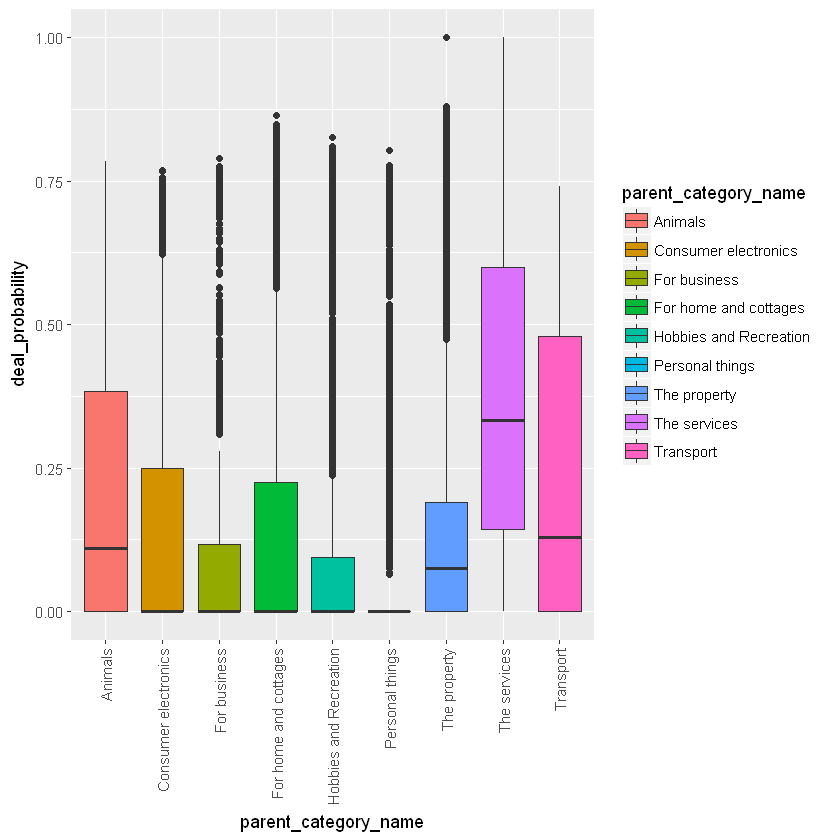

In [14]:
## issue with this
library(ggplot2)
ggplot(analysis.anova, aes(x=parent_category_name, y=deal_probability,  fill=parent_category_name)) + 
     geom_boxplot() + 
     theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1))

<h1> ANOVA - Oneway Models </h1> <h3> Parent Category Name is the Levels / Factors/categories. Finding this data against Deal_probability is will give is this significant.

In [15]:
model1<- aov(analysis.anova$deal_probability~analysis.anova$parent_category_name)
print(model1)

Call:
   aov(formula = analysis.anova$deal_probability ~ analysis.anova$parent_category_name)

Terms:
                analysis.anova$parent_category_name Residuals
Sum of Squares                              6628.69  64117.90
Deg. of Freedom                                   8   1048566

Residual standard error: 0.2472816
Estimated effects may be unbalanced


In [16]:
summary(model1)

                                         Df Sum Sq Mean Sq F value Pr(>F)    
analysis.anova$parent_category_name       8   6629   828.6   13550 <2e-16 ***
Residuals                           1048566  64118     0.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [17]:
model2 <-  oneway.test(analysis.anova$deal_probability~analysis.anova$parent_category_name)
print(model2)


	One-way analysis of means (not assuming equal variances)

data:  analysis.anova$deal_probability and analysis.anova$parent_category_name
F = 10188, num df = 8, denom df = 150150, p-value < 2.2e-16



In [19]:
# Chisquare
model3 <- kruskal.test(analysis.anova$deal_probability~analysis.anova$parent_category_name)
print(model3)


	Kruskal-Wallis rank sum test

data:  analysis.anova$deal_probability by analysis.anova$parent_category_name
Kruskal-Wallis chi-squared = 163440, df = 8, p-value < 2.2e-16



<h3> Pairwise T-test </h3>

In [21]:
pairwise.t.test(analysis.anova$deal_probability, analysis.anova$parent_category_name,
                 p.adjust.method = "BH", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  analysis.anova$deal_probability and analysis.anova$parent_category_name 

                       Animals Consumer electronics For business
Consumer electronics   < 2e-16 -                    -           
For business           < 2e-16 < 2e-16              -           
For home and cottages  < 2e-16 9.2e-05              < 2e-16     
Hobbies and Recreation < 2e-16 < 2e-16              1.1e-07     
Personal things        < 2e-16 < 2e-16              < 2e-16     
The property           < 2e-16 < 2e-16              < 2e-16     
The services           < 2e-16 < 2e-16              < 2e-16     
Transport              < 2e-16 < 2e-16              < 2e-16     
                       For home and cottages Hobbies and Recreation
Consumer electronics   -                     -                     
For business           -                     -                     
For home and cottages  -                     -                     
Hobb

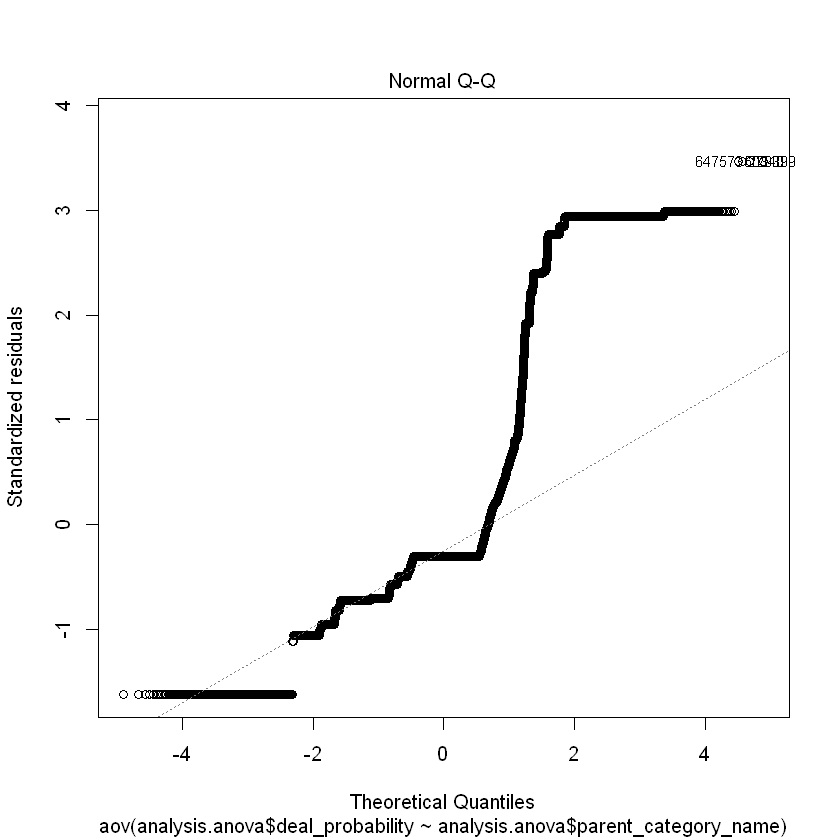

In [22]:
#normality plot			 
plot(model1, 2)		